In [1]:
# Instalar la biblioteca pandas, si no está instalada

# ESTO ES NECESARIO PARA LOS QUE TRABAJAN DESDE GOOGLE COLAB
#!pip install pandas
#!pip install pyspark


In [2]:
import pandas as pd

from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession
from pyspark.sql.functions import col


In [3]:
spark = SparkSession \
    .builder \
    .appName("Ejemplo de DataFrames con Spark en Python") \
    .getOrCreate()


In [4]:
spark

Ahora ingresamos en
    ---- > **Spark UI**
    


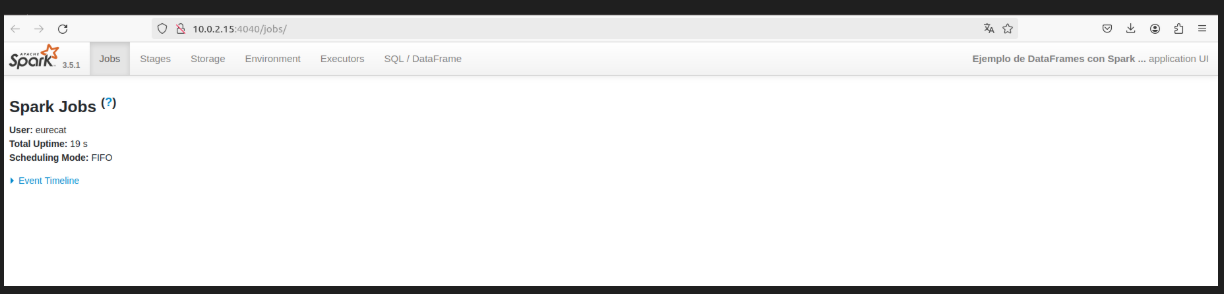


Estamos en la interfaz de usuario web de Apache Spark.
Esta es una herramienta esencial para monitorear y gestionar aplicaciones de Spark en tiempo real.

Esta interfaz ofrece una visión detallada del estado y el rendimiento de los trabajos de Spark que se están ejecutando.

Para más información:
- [Entendiendo la Interfaz de Usuario de Spark](https://medium.com/iwannabedatadriven/entendiendo-la-interfaz-de-usuario-de-spark-web-ui-spark-i-d03c6bd562a5)
- [Monitorización con Spark UI en AWS](https://docs.aws.amazon.com/es_es/glue/latest/dg/monitor-spark-ui.html)



### ¿Cón qué datos vamos a trabjar?

Vamos a trabajar con datos disponibles en Open Data del Ayuntamiento de Barcelona sobre accidentes según causa del conductor gestionados por la Guàrdia Urbana en la ciudad de Barcelona.

- [Enlace del dataset](https://opendata-ajuntament.barcelona.cat/data/es/dataset/accidents_causa_conductor_gu_bcn/resource/5a040155-38b3-4b19-a4b0-c84a0618d363)
- [Descripción de los campos](https://opendata-ajuntament.barcelona.cat/data/es/dataset/accidents_causa_conductor_gu_bcn)



---> Para acceder a mayor información es necesario acceder en:

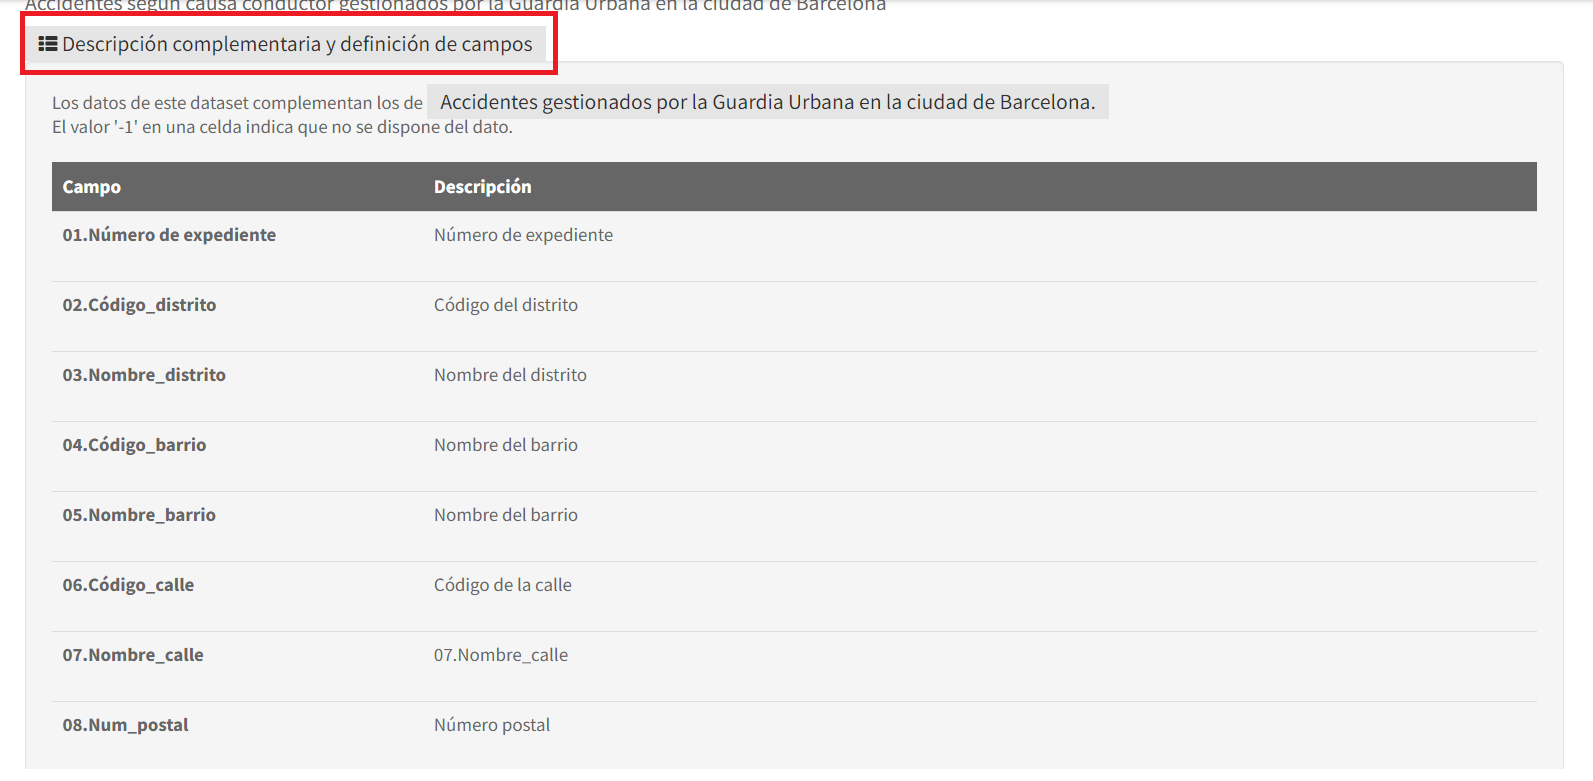

In [5]:
import csv


ESTO ES SOLO PARA LOS QUE TRABAJAN DESDE GOOGLE COLAB

Para cargar el archivo a su espacio de Google Colab deben ingresar aquí:


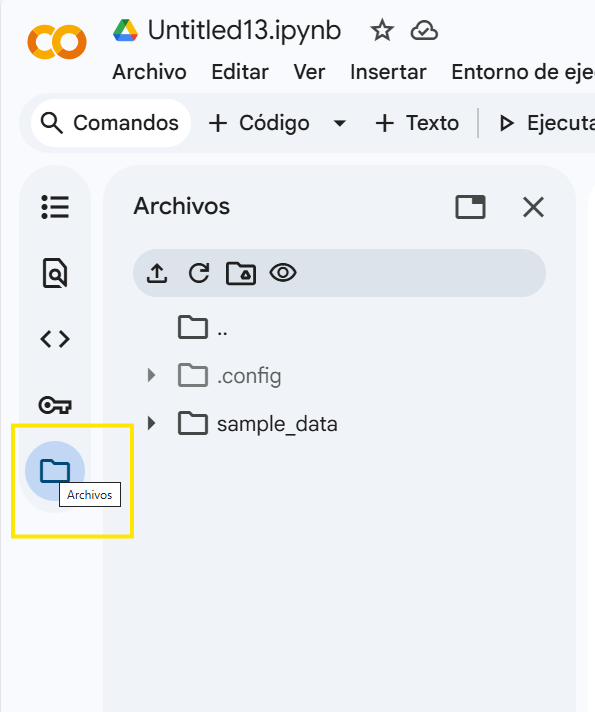

Luego deben ingresar aquí:


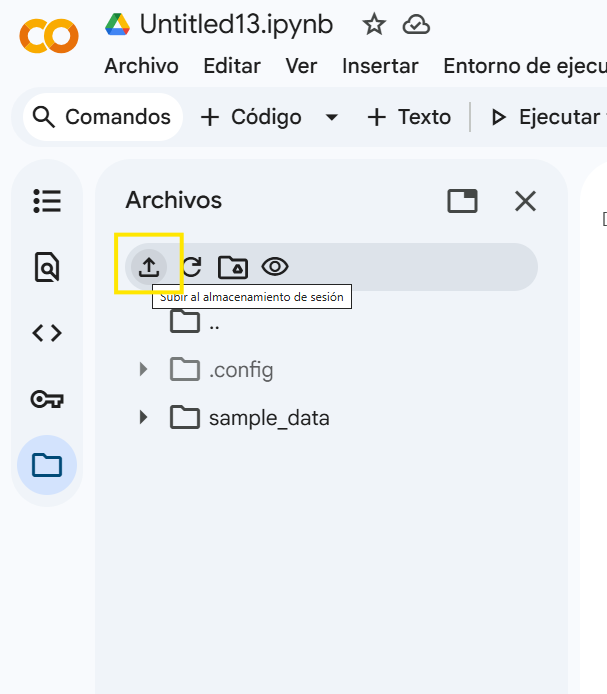

Seleccionar el archivo que quieren subir.

Su resultado final debe verse así:


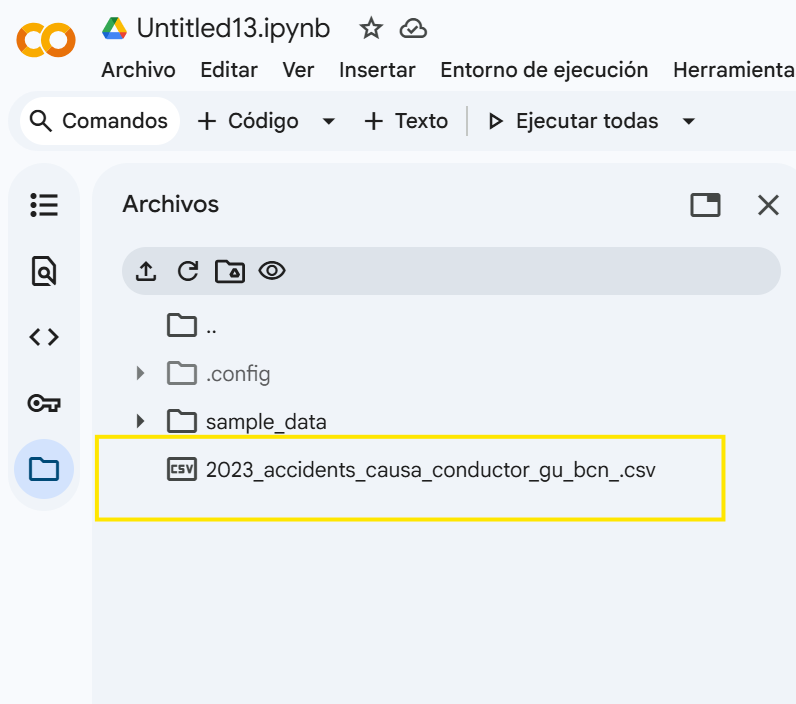


Ahora si disponen del archivo .csv para continuar con el script

In [ ]:
# Especifica la ruta donde quieres guardar el archivo CSV
# Leer el archivo CSV en un DataFrame de Pandas
df_barcelona = pd.read_csv('2023_accidents_causa_conductor_gu_bcn_.csv')


In [7]:
df_barcelona.head()

,Numero_expedient,Codi_districte,Nom_districte,Codi_barri,Nom_barri,Codi_carrer,Nom_carrer,Num_postal,Descripcio_dia_setmana,NK_Any,Mes_any,Nom_mes,Dia_mes,Hora_dia,Descripcio_torn,Descripcio_causa_mediata,Coordenada_UTM_X_ED50,Coordenada_UTM_Y_ED50,Longitud_WGS84,Latitud_WGS84
0,2023S000699,-1,Desconegut,-1,Desconegut,-1,Rovira (ascendent) ...,0,Dissabte,2023,2,Febrer,4,16,Tarda,Manca d'atenció a la conducció,430443.36,4585232.00,2.166596,41.413783
1,2023S005197,-1,Desconegut,-1,Desconegut,-1,Estatut de Catalunya ...,11,Divendres,2023,9,Setembre,1,13,Matí,No respectar distàncies,429493.73,4587108.15,2.155015,41.430598
2,2023S007430,-1,Desconegut,-1,Desconegut,-1,Rovira (ascendent) ...,0,Divendres,2023,12,Desembre,15,11,Matí,No respectar distàncies,430443.36,4585232.00,2.166596,41.413783
3,2023S000961,-1,Desconegut,-1,Desconegut,-1,Amílcar ...,120,Dissabte,2023,1,Gener,28,14,Tarda,No respectat pas de vianants,430955.45,4586335.10,2.172596,41.423762
4,2023S006486,-1,Desconegut,-1,Desconegut,-1,Augusta / Hort de la Vila ...,NaN,Dijous,2023,11,Novembre,2,14,Tarda,Desobeir semàfor,426883.33,4583690.92,2.124189,41.399587


In [8]:
sdf = spark.createDataFrame(df_barcelona)

In [9]:
sdf.printSchema()

root
 |-- Numero_expedient: string (nullable = true)
 |-- Codi_districte: long (nullable = true)
 |-- Nom_districte: string (nullable = true)
 |-- Codi_barri: long (nullable = true)
 |-- Nom_barri: string (nullable = true)
 |-- Codi_carrer: long (nullable = true)
 |-- Nom_carrer: string (nullable = true)
 |-- Num_postal : string (nullable = true)
 |-- Descripcio_dia_setmana: string (nullable = true)
 |-- NK_Any: long (nullable = true)
 |-- Mes_any: long (nullable = true)
 |-- Nom_mes: string (nullable = true)
 |-- Dia_mes: long (nullable = true)
 |-- Hora_dia: long (nullable = true)
 |-- Descripcio_torn: string (nullable = true)
 |-- Descripcio_causa_mediata: string (nullable = true)
 |-- Coordenada_UTM_X_ED50: double (nullable = true)
 |-- Coordenada_UTM_Y_ED50: double (nullable = true)
 |-- Longitud_WGS84: double (nullable = true)
 |-- Latitud_WGS84: double (nullable = true)



Posibles tipos de datos que podemos encontrar:

| Tipo de Dato | Descripción                                               | Ejemplo                 |
|--------------|-----------------------------------------------------------|-------------------------|
| string       | Cadena de caracteres que puede contener texto o números.  | "Barcelona", "08001"    |
| long         | Número entero largo, útil para identificar elementos.     | 12345, 2021             |
| double       | Número con punto decimal, utilizado para valores precisos.| 41.3851, 2.1734         |


Para más información sobre tipos de datos, consulta: [Spark SQL Data Types](https://spark.apache.org/docs/latest/sql-ref-datatypes.html)


In [10]:
sdf.show(5)

+----------------+--------------+-------------+----------+----------+-----------+--------------------+-----------+----------------------+------+-------+--------+-------+--------+---------------+------------------------+---------------------+---------------------+--------------+-------------+
|Numero_expedient|Codi_districte|Nom_districte|Codi_barri| Nom_barri|Codi_carrer|          Nom_carrer|Num_postal |Descripcio_dia_setmana|NK_Any|Mes_any| Nom_mes|Dia_mes|Hora_dia|Descripcio_torn|Descripcio_causa_mediata|Coordenada_UTM_X_ED50|Coordenada_UTM_Y_ED50|Longitud_WGS84|Latitud_WGS84|
+----------------+--------------+-------------+----------+----------+-----------+--------------------+-----------+----------------------+------+-------+--------+-------+--------+---------------+------------------------+---------------------+---------------------+--------------+-------------+
| 2023S000699    |            -1|   Desconegut|        -1|Desconegut|         -1|Rovira (ascendent...| 0         |       

### Volvemos a la interfaz de usuario de Apache Spark

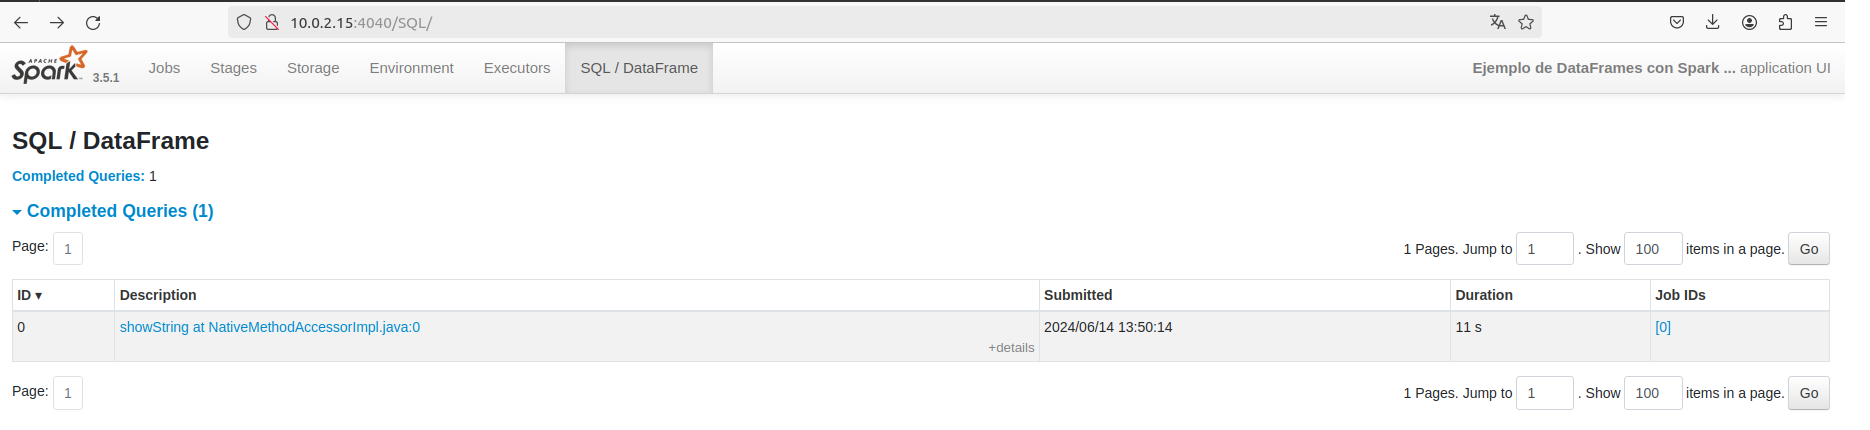

In [11]:
sdf.select('Nom_districte').show(20)

+-------------+
|Nom_districte|
+-------------+
|   Desconegut|
|   Desconegut|
|   Desconegut|
|   Desconegut|
|   Desconegut|
|   Desconegut|
|   Desconegut|
|   Desconegut|
|   Desconegut|
|   Desconegut|
|   Desconegut|
|   Desconegut|
|   Desconegut|
|   Sant Martí|
|   Sant Martí|
|   Sant Martí|
|   Sant Martí|
|   Sant Martí|
|   Sant Martí|
|   Sant Martí|
+-------------+
only showing top 20 rows



### Volvemos a la interfaz de usuario de Apache Spark

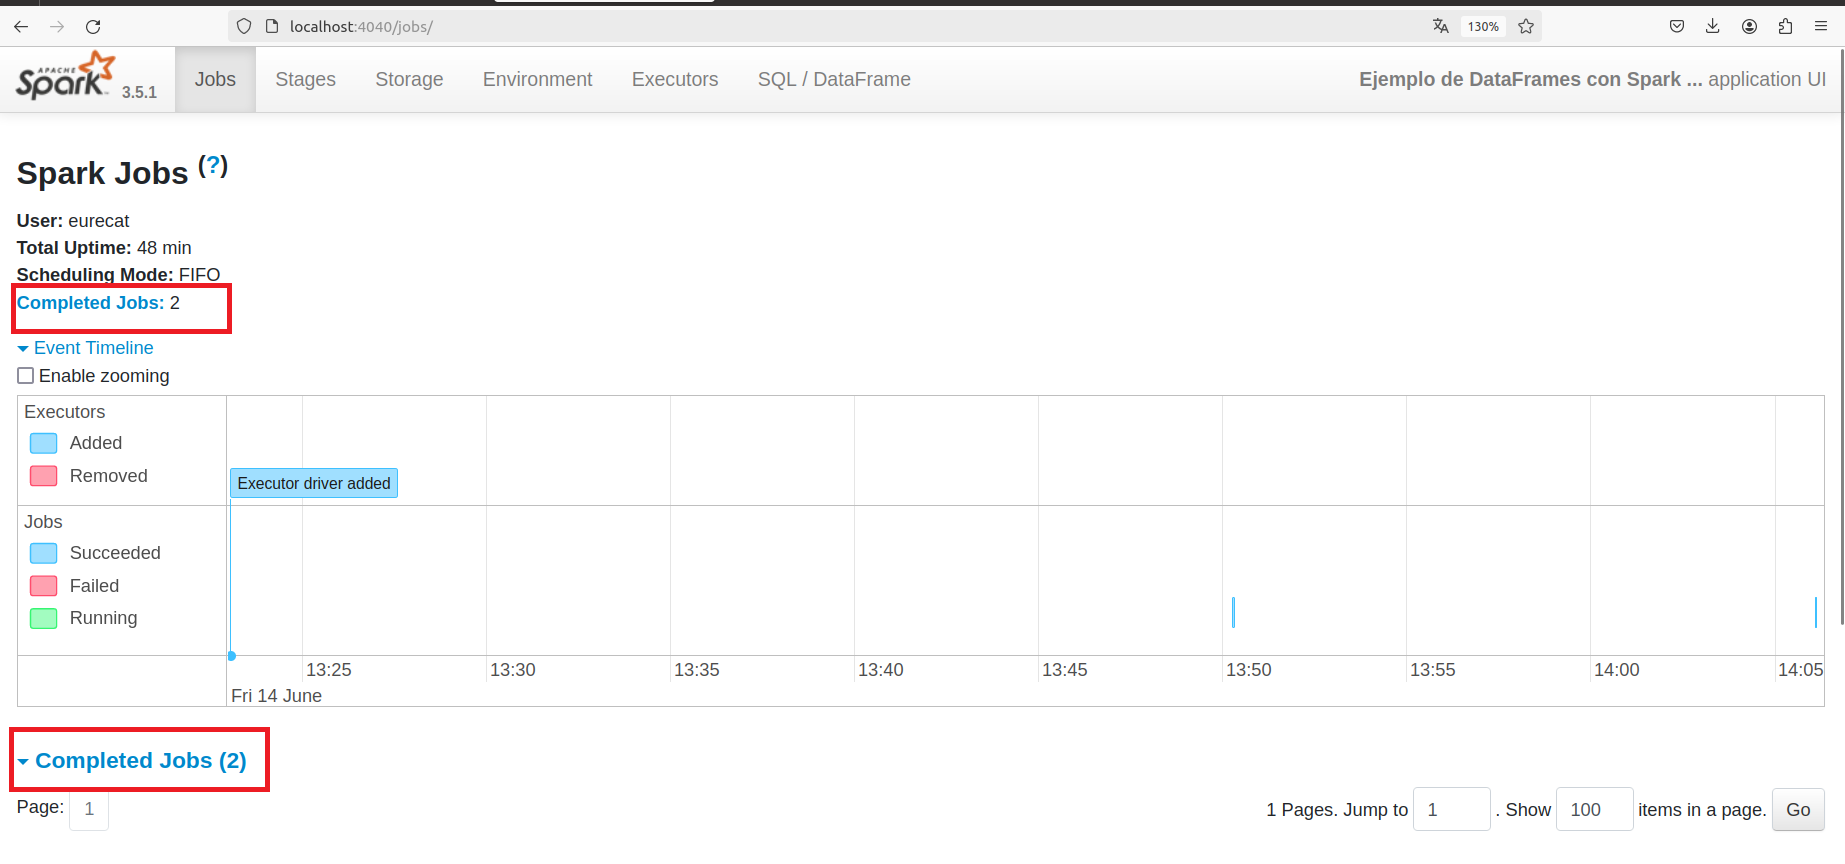

In [12]:
sdf.filter(sdf['Mes_any'] < 6).show(20)

+----------------+--------------+-------------+----------+--------------------+-----------+--------------------+-----------+----------------------+------+-------+-------+-------+--------+---------------+------------------------+---------------------+---------------------+--------------+-------------+
|Numero_expedient|Codi_districte|Nom_districte|Codi_barri|           Nom_barri|Codi_carrer|          Nom_carrer|Num_postal |Descripcio_dia_setmana|NK_Any|Mes_any|Nom_mes|Dia_mes|Hora_dia|Descripcio_torn|Descripcio_causa_mediata|Coordenada_UTM_X_ED50|Coordenada_UTM_Y_ED50|Longitud_WGS84|Latitud_WGS84|
+----------------+--------------+-------------+----------+--------------------+-----------+--------------------+-----------+----------------------+------+-------+-------+-------+--------+---------------+------------------------+---------------------+---------------------+--------------+-------------+
| 2023S000699    |            -1|   Desconegut|        -1|          Desconegut|         -1|Rov

In [13]:
sdf.filter(sdf['Nom_districte'] == "Sant Martí").show()


+----------------+--------------+-------------+----------+--------------------+-----------+--------------------+-----------+----------------------+------+-------+--------+-------+--------+---------------+------------------------+---------------------+---------------------+--------------+-------------+
|Numero_expedient|Codi_districte|Nom_districte|Codi_barri|           Nom_barri|Codi_carrer|          Nom_carrer|Num_postal |Descripcio_dia_setmana|NK_Any|Mes_any| Nom_mes|Dia_mes|Hora_dia|Descripcio_torn|Descripcio_causa_mediata|Coordenada_UTM_X_ED50|Coordenada_UTM_Y_ED50|Longitud_WGS84|Latitud_WGS84|
+----------------+--------------+-------------+----------+--------------------+-----------+--------------------+-----------+----------------------+------+-------+--------+-------+--------+---------------+------------------------+---------------------+---------------------+--------------+-------------+
| 2023S004984    |            10|   Sant Martí|        64|el Camp de l'Arpa...|     209900|

In [14]:
sdf.withColumn('Minutos_desde_medianoche', col('Hora_dia') * 60).show(35)


+----------------+--------------+-------------+----------+--------------------+-----------+--------------------+-----------+----------------------+------+-------+--------+-------+--------+---------------+------------------------+---------------------+---------------------+--------------+-------------+------------------------+
|Numero_expedient|Codi_districte|Nom_districte|Codi_barri|           Nom_barri|Codi_carrer|          Nom_carrer|Num_postal |Descripcio_dia_setmana|NK_Any|Mes_any| Nom_mes|Dia_mes|Hora_dia|Descripcio_torn|Descripcio_causa_mediata|Coordenada_UTM_X_ED50|Coordenada_UTM_Y_ED50|Longitud_WGS84|Latitud_WGS84|Minutos_desde_medianoche|
+----------------+--------------+-------------+----------+--------------------+-----------+--------------------+-----------+----------------------+------+-------+--------+-------+--------+---------------+------------------------+---------------------+---------------------+--------------+-------------+------------------------+
| 2023S000699   

In [15]:
sdf.select('Nom_districte').distinct().show()

+-------------------+
|      Nom_districte|
+-------------------+
|             Gràcia|
|         Sant Martí|
|     Horta-Guinardó|
|          Les Corts|
|     Sants-Montjuïc|
|         Nou Barris|
|Sarrià-Sant Gervasi|
|           Eixample|
|         Desconegut|
|        Sant Andreu|
|       Ciutat Vella|
+-------------------+



# Comenzamos con otro ejemplo

In [16]:
from pyspark.sql.functions import col, avg, stddev


In [17]:
data = [("P101", "Laptop"), ("P102", "Mouse"), ("P103", "Monitor"), ("P104", "Keyboard"), ("P105", "Printer")]


In [18]:
data

[('P101', 'Laptop'),
 ('P102', 'Mouse'),
 ('P103', 'Monitor'),
 ('P104', 'Keyboard'),
 ('P105', 'Printer')]

In [19]:
columns = ["product_id", "product_name"]


In [20]:
columns

['product_id', 'product_name']

In [21]:
dataframe_1 = spark.createDataFrame(data, columns)

In [22]:
dataframe_1.show()

+----------+------------+
|product_id|product_name|
+----------+------------+
|      P101|      Laptop|
|      P102|       Mouse|
|      P103|     Monitor|
|      P104|    Keyboard|
|      P105|     Printer|
+----------+------------+



In [23]:
data2 = [
    ("P101", 1500), ("P102", 25), ("P103", 300), ("P104", None), ("P105", 200),
    ("P106", 100), ("P107", 400), ("P108", 800), ("P109", None), ("P110", 50),
    ("P111", 75), ("P112", 250), ("P113", 150), ("P114", 700), ("P115", None)
]


columns2 = ["product_id", "price"]

In [24]:
data2

[('P101', 1500),
 ('P102', 25),
 ('P103', 300),
 ('P104', None),
 ('P105', 200),
 ('P106', 100),
 ('P107', 400),
 ('P108', 800),
 ('P109', None),
 ('P110', 50),
 ('P111', 75),
 ('P112', 250),
 ('P113', 150),
 ('P114', 700),
 ('P115', None)]

In [25]:
columns2

['product_id', 'price']

In [26]:
dataframe_2 = spark.createDataFrame(data2, columns2)

In [27]:
dataframe_2.show()

+----------+-----+
|product_id|price|
+----------+-----+
|      P101| 1500|
|      P102|   25|
|      P103|  300|
|      P104| NULL|
|      P105|  200|
|      P106|  100|
|      P107|  400|
|      P108|  800|
|      P109| NULL|
|      P110|   50|
|      P111|   75|
|      P112|  250|
|      P113|  150|
|      P114|  700|
|      P115| NULL|
+----------+-----+



In [28]:
combined_df = dataframe_1.join(dataframe_2, on="product_id", how="inner")

In [29]:
combined_df.show()

+----------+------------+-----+
|product_id|product_name|price|
+----------+------------+-----+
|      P101|      Laptop| 1500|
|      P102|       Mouse|   25|
|      P103|     Monitor|  300|
|      P104|    Keyboard| NULL|
|      P105|     Printer|  200|
+----------+------------+-----+



In [30]:
dataframe_2.show()

+----------+-----+
|product_id|price|
+----------+-----+
|      P101| 1500|
|      P102|   25|
|      P103|  300|
|      P104| NULL|
|      P105|  200|
|      P106|  100|
|      P107|  400|
|      P108|  800|
|      P109| NULL|
|      P110|   50|
|      P111|   75|
|      P112|  250|
|      P113|  150|
|      P114|  700|
|      P115| NULL|
+----------+-----+



In [31]:
filled_df = dataframe_2.fillna({"price": -999})

In [32]:
filled_df.show()

+----------+-----+
|product_id|price|
+----------+-----+
|      P101| 1500|
|      P102|   25|
|      P103|  300|
|      P104| -999|
|      P105|  200|
|      P106|  100|
|      P107|  400|
|      P108|  800|
|      P109| -999|
|      P110|   50|
|      P111|   75|
|      P112|  250|
|      P113|  150|
|      P114|  700|
|      P115| -999|
+----------+-----+



# Otro ejemplo

In [33]:
data = [
    ("P101", 2, 1500),
    ("P102", 5, 25),
    ("P103", 1, 300),
    ("P104", 3, 400),
    ("P105", 4, 200),
    ("P106", 2, 100),
    ("P107", 5, 400),
    ("P108", 1, 800),
    ("P109", 3, 400),
    ("P110", 4, 400),
    ("P111", 2, 75),
    ("P112", 5, 250),
    ("P113", 3, 150),
    ("P114", 4, 700),
    ("P115", 5, 400)
]
columns = ["product_id", "quantity", "price"]
sdf = spark.createDataFrame(data, columns)

In [34]:
sdf.show()

+----------+--------+-----+
|product_id|quantity|price|
+----------+--------+-----+
|      P101|       2| 1500|
|      P102|       5|   25|
|      P103|       1|  300|
|      P104|       3|  400|
|      P105|       4|  200|
|      P106|       2|  100|
|      P107|       5|  400|
|      P108|       1|  800|
|      P109|       3|  400|
|      P110|       4|  400|
|      P111|       2|   75|
|      P112|       5|  250|
|      P113|       3|  150|
|      P114|       4|  700|
|      P115|       5|  400|
+----------+--------+-----+



In [35]:
print("Precio promedio y desvío estándar por cantidad de productos:")
sdf.groupby('quantity').agg(
    avg(col('price')).alias('average_price'),
    stddev(col('price')).alias('stddev_price')
).show()

Precio promedio y desvío estándar por cantidad de productos:
+--------+-----------------+------------------+
|quantity|    average_price|      stddev_price|
+--------+-----------------+------------------+
|       5|           268.75|177.21808598447282|
|       1|            550.0| 353.5533905932738|
|       3|316.6666666666667|144.33756729740642|
|       2|558.3333333333334| 815.6030488744714|
|       4|433.3333333333333|251.66114784235833|
+--------+-----------------+------------------+



In [36]:
print("Número de productos por cantidad, ordenados:")
sdf.groupby(['quantity']).agg({"price": "count"}).sort("count(price)", ascending=False).show()


Número de productos por cantidad, ordenados:
+--------+------------+
|quantity|count(price)|
+--------+------------+
|       5|           4|
|       3|           3|
|       2|           3|
|       4|           3|
|       1|           2|
+--------+------------+



In [37]:
print("DataFrame con nueva columna 'total_value' (cantidad * precio) ordenado por 'total_value':")
sdf.withColumn('total_value', sdf['quantity'] * sdf['price']).sort('total_value', ascending=False).show()

DataFrame con nueva columna 'total_value' (cantidad * precio) ordenado por 'total_value':
+----------+--------+-----+-----------+
|product_id|quantity|price|total_value|
+----------+--------+-----+-----------+
|      P101|       2| 1500|       3000|
|      P114|       4|  700|       2800|
|      P107|       5|  400|       2000|
|      P115|       5|  400|       2000|
|      P110|       4|  400|       1600|
|      P112|       5|  250|       1250|
|      P104|       3|  400|       1200|
|      P109|       3|  400|       1200|
|      P105|       4|  200|        800|
|      P108|       1|  800|        800|
|      P113|       3|  150|        450|
|      P103|       1|  300|        300|
|      P106|       2|  100|        200|
|      P111|       2|   75|        150|
|      P102|       5|   25|        125|
+----------+--------+-----+-----------+



In [38]:
spark.stop()

###   Recursos adicionales

- [Tutorial de Pyspark: Primeros pasos con Pyspark](hhttps://www.datacamp.com/es/tutorial/pyspark-tutorial-getting-started-with-pyspark)




###   Tabla de Comandos que Generan Cambios en la Interfaz de PySpark


Esta tabla proporciona una guía clara y concisa sobre los comandos comunes en PySpark que generan cambios en la interfaz de usuario, junto con sus explicaciones y ejemplos de uso:




| Comando                              | Explicación                                                                                               | Ejemplo                                                     |
|--------------------------------------|-----------------------------------------------------------------------------------------------------------|-------------------------------------------------------------|
| `show()`                             | Muestra las primeras filas del DataFrame.                                                                 | `sdf.show(5)`                                               |
| `groupBy().agg()`                    | Agrupa los datos por una columna y realiza operaciones de agregación.                                     | `sdf.groupBy('quantity').agg({'price': 'avg'}).show()`      |
| `filter()`                           | Filtra las filas del DataFrame según una condición.                                                       | `sdf.filter(sdf['quantity'] > 2).show()`                    |
| `select()`                           | Selecciona columnas específicas del DataFrame.                                                            | `sdf.select('product_id', 'price').show()`                  |
| `join()`                             | Une dos DataFrames basados en una columna común.                                                          | `sdf1.join(sdf2, sdf1['product_id'] == sdf2['product_id']).show()` |
| `withColumn()`                       | Añade o reemplaza una columna en el DataFrame.                                                            | `sdf.withColumn('total_value', sdf['quantity'] * sdf['price']).show()` |
| `sort()`                             | Ordena el DataFrame por una o más columnas.                                                               | `sdf.sort('price', ascending=False).show()`                 |
| `distinct()`                         | Devuelve un DataFrame con filas únicas, eliminando duplicados.                                            | `sdf.select('product_id').distinct().show()`                |
| `cache()`                            | Almacena el DataFrame en la memoria caché para mejorar el rendimiento en futuras operaciones.              | `sdf.cache()`                                               |
| `unpersist()`                        | Elimina el DataFrame de la memoria caché.                                                                 | `sdf.unpersist()`                                           |
| `count()`                            | Cuenta el número de filas en el DataFrame.                                                                | `sdf.count()`                                               |
| `spark.stop()`                       | Detiene la sesión activa de Spark y libera los recursos asociados.                                         | `spark.stop()`                                              |
